# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Revan Azriel Langa Aditya
- **Email:** m010b4ky3764@bangkit.academy
- **ID Dicoding:** m010b4ky3764

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana distribusi penyewaan sepeda di sepanjang hari (*hour*)?
- Bagaimana pengaruh hari dalam seminggu (*weekday*) terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [37]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
# Load dataset "day.csv"
day_data = pd.read_csv('day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [39]:
# Load dataset "hour.csv"
hour_data = pd.read_csv('hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_data`

In [40]:
# Melihat info dari tabel
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [41]:
# Memerikasa missing value
day_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [42]:
# Menampilkan statistik deskriptif
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [43]:
# Memeriksa jumlah duplikasi pada data
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


#### Menilai tabel `hour_data`

In [44]:
# Melihat info dari tabel
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [45]:
# Memerikasa missing value
hour_data.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [46]:
# Menampilkan statistik deskriptif
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [47]:
# Memeriksa jumlah duplikasi pada data
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

Data `day_data` dan `hour_data` sudah bersih / tidak ada masalah.

## Exploratory Data Analysis (EDA)

### Explore `day_data`

In [48]:
# Memeriksa data secara acak
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
187,188,2011-07-07,3,0,7,0,4,1,1,0.750000,0.686871,0.651250,0.159200,754,3838,4592
122,123,2011-05-03,2,0,5,0,2,1,2,0.616667,0.582079,0.697083,0.342667,603,3848,4451
133,134,2011-05-14,2,0,5,0,6,0,2,0.520833,0.500629,0.922500,0.134950,902,2507,3409
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445
642,643,2012-10-04,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,7328


In [49]:
# Menampilkan statistik deskriptif
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [50]:
# Mengubah menjadi tipe data datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Explore `hour_data`

In [51]:
# Memeriksa data secara acak
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
187,188,2011-07-07,3,0,7,0,4,1,1,0.750000,0.686871,0.651250,0.159200,754,3838,4592
620,621,2012-09-12,3,1,9,0,3,1,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870
531,532,2012-06-15,2,1,6,0,5,1,1,0.639167,0.599754,0.589583,0.176617,1563,6102,7665
510,511,2012-05-25,2,1,5,0,5,1,1,0.680000,0.627529,0.747083,0.140550,1417,5317,6734
527,528,2012-06-11,2,1,6,0,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664


In [52]:
# Menampilkan statistik deskriptif
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [53]:
# Mengubah menjadi tipe data datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [54]:
# Mengabungkan data day_data dan hour_data
main_data = pd.merge(day_data, hour_data, on='dteday', how='inner')

In [55]:
# Menyimpan main_data
main_data.to_csv('main_data.csv', index=False)

In [56]:
#from google.colab import files
#files.download('main_data.csv')


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?

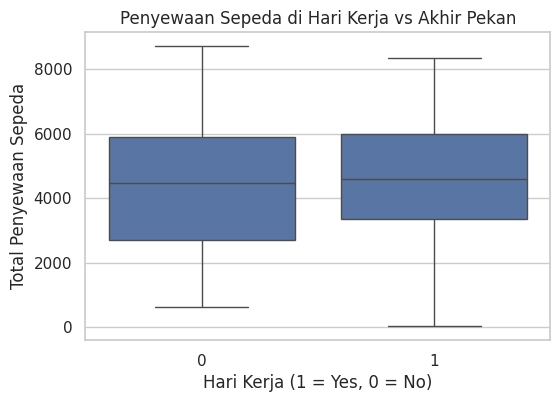

In [57]:
# 1. Perbandingan sewa sepeda antara hari kerja dan akhir pekan
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.boxplot(x="workingday", y="cnt", data=day_data)
plt.title("Penyewaan Sepeda di Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (1 = Yes, 0 = No)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

### Pertanyaan 2:
Bagaimana distribusi penyewaan sepeda di sepanjang hari (*hour*)?

<ipython-input-58-bdacf887e03f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_data, ci=None)


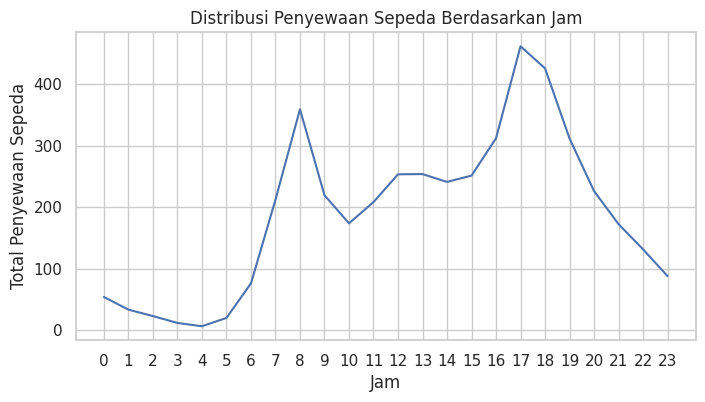

In [58]:
# 2. Distribusi penyewaan sepeda di sepanjang hari
plt.figure(figsize=(8, 4))
sns.lineplot(x="hr", y="cnt", data=hour_data, ci=None)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.show()

### Pertanyaan 3:
Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?

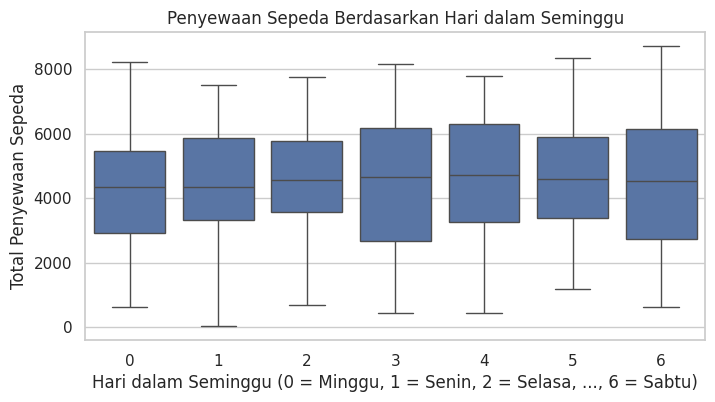

In [59]:
# Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?
plt.figure(figsize=(8, 4))
sns.boxplot(x="weekday", y="cnt", data=day_data)
plt.title("Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 1 = Senin, 2 = Selasa, ..., 6 = Sabtu)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

## Conclusion

1. Perbandingan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan:

> Grafik boxplot menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini bisa disebabkan oleh pengguna yang menggunakan sepeda sebagai sarana transportasi untuk bekerja.

2. Distribusi Penyewaan Sepeda di Sepanjang Hari:

> Grafik line plot menunjukkan tren penyewaan sepeda per jam. Terdapat dua puncak penyewaan utama: pagi sekitar pukul 8-9 (mungkin karena orang pergi bekerja) dan sore sekitar pukul 17-18 (kemungkinan karena pulang kerja).

3. Pengaruh Hari dalam Seminggu terhadap Jumlah Penyewaan Sepeda:

> Grafik boxplot menunjukkan distribusi penyewaan berdasarkan hari dalam seminggu. Hari kerja (terutama hari Senin hingga Jumat) cenderung memiliki lebih banyak penyewaan sepeda dibandingkan akhir pekan, yang menegaskan pola serupa dengan analisis hari kerja.